In [1]:
#Import relevant libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
#Import the data and generate Dummy Variables for Movement
dta = pd.read_excel('Full Data - Unseparated.xlsx')
classification_dta=pd.get_dummies(dta, columns=['Movement'])

In [4]:
#Define Input and Output for the Model
x=classification_dta.drop(columns=['Date', 'Neg', 'Pos', 'Net', 'SC-RPD', 'SC-Logit', 'JKSE', 'dJKSE', 'Movement_0', 'Movement_1'])
y=classification_dta[['Movement_0', 'Movement_1']]

In [5]:
#Split the Data into Train and Test Batches
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Data Standardization
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.fit_transform(x_test))

#Neural Network Model Initiation
model=Sequential()

model.add(Dense(4, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.0008),
             metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('macro-binary2_model{epoch:08d}.h5', save_freq=5) 

In [35]:
history=model.fit(x_train, y_train, callbacks= checkpoint, batch_size= 32, epochs= 500, validation_data= (x_test,y_test))

Epoch 1/500
7/7 [==============================] - 0s 15ms/step - loss: 0.7525 - accuracy: 0.5540 - val_loss: 0.7212 - val_accuracy: 0.5370
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7491 - accuracy: 0.5634 - val_loss: 0.7181 - val_accuracy: 0.5370
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7457 - accuracy: 0.5634 - val_loss: 0.7152 - val_accuracy: 0.5370
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7423 - accuracy: 0.5681 - val_loss: 0.7125 - val_accuracy: 0.5556
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7395 - accuracy: 0.5775 - val_loss: 0.7099 - val_accuracy: 0.5926
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7366 - accuracy: 0.5728 - val_loss: 0.7075 - val_accuracy: 0.5926
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7336 - accuracy: 0.5728 - val_loss: 0.7053 - val_accuracy: 0.5926
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6244 - val_loss: 0.6569 - val_accuracy: 0.5926
Epoch 118/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.6244 - val_loss: 0.6568 - val_accuracy: 0.5926
Epoch 119/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.6244 - val_loss: 0.6568 - val_accuracy: 0.5926
Epoch 120/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6700 - accuracy: 0.6244 - val_loss: 0.6567 - val_accuracy: 0.5926
Epoch 121/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6244 - val_loss: 0.6566 - val_accuracy: 0.6111
Epoch 122/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6244 - val_loss: 0.6566 - val_accuracy: 0.6111
Epoch 123/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.6291 - val_loss: 0.6564 - val_accuracy: 0.6111
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6338 - val_loss: 0.6550 - val_accuracy: 0.5926
Epoch 234/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6338 - val_loss: 0.6551 - val_accuracy: 0.5926
Epoch 235/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6338 - val_loss: 0.6551 - val_accuracy: 0.5926
Epoch 236/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6338 - val_loss: 0.6551 - val_accuracy: 0.5926
Epoch 237/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6514 - accuracy: 0.6385 - val_loss: 0.6550 - val_accuracy: 0.5926
Epoch 238/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6512 - accuracy: 0.6385 - val_loss: 0.6551 - val_accuracy: 0.5926
Epoch 239/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6338 - val_loss: 0.6552 - val_accuracy: 0.5926
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6479 - val_loss: 0.6574 - val_accuracy: 0.6296
Epoch 350/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.6479 - val_loss: 0.6573 - val_accuracy: 0.6296
Epoch 351/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6360 - accuracy: 0.6479 - val_loss: 0.6573 - val_accuracy: 0.6481
Epoch 352/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.6526 - val_loss: 0.6573 - val_accuracy: 0.6296
Epoch 353/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.6479 - val_loss: 0.6573 - val_accuracy: 0.6296
Epoch 354/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6479 - val_loss: 0.6572 - val_accuracy: 0.6296
Epoch 355/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6479 - val_loss: 0.6572 - val_accuracy: 0.6296
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.6238 - accuracy: 0.6432 - val_loss: 0.6565 - val_accuracy: 0.6667
Epoch 466/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6432 - val_loss: 0.6563 - val_accuracy: 0.6667
Epoch 467/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.6432 - val_loss: 0.6561 - val_accuracy: 0.6667
Epoch 468/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6235 - accuracy: 0.6479 - val_loss: 0.6562 - val_accuracy: 0.6667
Epoch 469/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.6479 - val_loss: 0.6561 - val_accuracy: 0.6667
Epoch 470/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6234 - accuracy: 0.6432 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 471/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6231 - accuracy: 0.6385 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 472/500
7/7 [========

Text(0, 0.5, 'Loss')

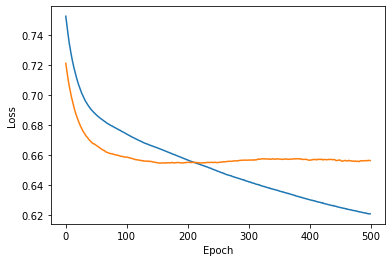

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [6]:
#Import Potential Model
#155, 162
PotModel=load_model('macro-binary2_model00000156.h5')
PotModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [98]:
# calculate predictions
predict = PotModel.predict(x_train)

# round predictions
round_value = [round(x[0]) for x in predict]
print(round_value)

# evaluate the model
print("training accuracy")
scores = PotModel.evaluate(x_train, y_train)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
training accuracy
7/7 [==============================] - 0s 500us/step - loss: 0.6639 - accuracy: 0.6432


In [99]:
# calculate predictions
predict = PotModel.predict(x_test)

# round predictions
round_value = [round(x[0]) for x in predict]
print(round_value)

# evaluate the model
print("testing accuracy")
scores = PotModel.evaluate(x_test, y_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
testing accuracy
2/2 [==============================] - 0s 0s/step - loss: 0.6546 - accuracy: 0.6111


In [41]:
#Import Validation Data
df = pd.read_excel('2021Data.xlsx')
classification_df=pd.get_dummies(df, columns=['Movement'])

In [42]:
#Define Input and Output for the Model
x_valid=classification_df.drop(columns=['Date', 'Pos', 'Neg', 'Net', 'SC-RPD', 'JKSE', 'dJKSE', 'Movement_0', 'Movement_1'])
y_valid=classification_df[['Movement_0', 'Movement_1']]

In [43]:
#Data Standardization
x_valid=pd.DataFrame(scaler.fit_transform(x_valid))

In [100]:
# calculate predictions
predict = PotModel.predict(x_valid)

# round predictions
round_value = [round(x[0]) for x in predict]
print(round_value)

# evaluate the model
print("validation accuracy")
scores = PotModel.evaluate(x_valid, y_valid)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
validation accuracy
4/4 [==============================] - 0s 334us/step - loss: 0.6907 - accuracy: 0.5492


In [115]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('Actual Movement')
    plt.xlabel('Predicted Movement')

In [113]:
y_pred = np.argmax(predict, axis=1)
#y_valid_np = y_valid.to_numpy()
y_valid = np.argmax(y_valid_np, axis=1)

cm = confusion_matrix(y_valid, y_pred)

Confusion matrix, without normalization
[[33 31]
 [24 34]]


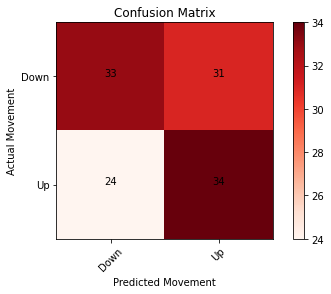

In [116]:
cm_plot_labels=['Down','Up']
plot_confusion_matrix(cm, cm_plot_labels, normalize=False, title='Confusion Matrix')

In [108]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
f1_score(y_valid, y_pred)

0.5528455284552846

In [109]:
recall_score(y_valid, y_pred)

0.5862068965517241

In [110]:
precision_score(y_valid, y_pred)

0.5230769230769231

In [111]:
accuracy_score(y_valid, y_pred)

0.5491803278688525

In [8]:
PotModel.get_weights()

[array([[ 0.21397   ,  0.75286275,  0.01982591, -0.37916964],
        [-0.33899993, -0.13339408,  0.8935695 , -0.07461214],
        [-0.09507138,  0.5386962 ,  0.22045313, -0.12539059],
        [-0.4253423 , -0.14527892, -0.57737905,  0.42981464],
        [ 0.01425722, -0.32060605,  0.42372206,  0.26541483]],
       dtype=float32),
 array([-0.2642933 ,  0.22931589,  0.01471828, -0.07020838], dtype=float32),
 array([[-0.56197125,  0.15290758],
        [-0.51084167,  0.54520994],
        [ 0.24008128, -0.58489853],
        [-0.02252161, -0.44383144]], dtype=float32),
 array([0.04951724, 0.14308757], dtype=float32)]